In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
master = pd.read_csv('data/master_503107.csv')
master.head()

,patent_number,grant_year,app_year,num_inventors,us_inventor,cite_foreign_patent,is_missing,num_design_cited,num_utility_cited,non-pat_refs,num_figures,num_assignees,priority_date,missing_data
0,D257752,1981,1980,1,1.0,0.0,1,1,2,1.0,6.0,1,1980,0
1,D257924,1981,1980,1,1.0,0.0,1,1,2,1.0,6.0,1,1980,0
2,D258382,1981,1980,2,1.0,0.0,1,2,1,0.0,5.0,1,1980,0
3,D258383,1981,1980,2,1.0,0.0,1,2,1,0.0,5.0,1,1980,0
6,D258678,1981,1980,2,1.0,0.0,1,2,1,0.0,5.0,1,1980,0


Need to find out which patents are continuations, and foreign priority

In [3]:
foreign = pd.read_csv('data/foreign_priority.tsv', delimiter ='\t', usecols=['patent_id','date','country_transformed'])
foreign.head()

,patent_id,date,country_transformed
0,4579440,1982-11-18,JP
1,4736480,1985-03-27,DE
2,D449111,2001-01-09,HK
3,5228311,1990-08-16,DE
4,9711226,2015-03-04,JP


In [4]:
related = pd.read_csv('data/usreldoc.tsv', delimiter='\t', usecols=['patent_id','doctype','date','relkind','reldocno','sequence'])
related.head()

,patent_id,doctype,relkind,reldocno,date,sequence
0,9683848,continuation-in-part,parent document,13336060,2011-12-23,36
1,8343191,related-publication,NaN,20080215100,2008-09-04,1
2,9435959,related-publication,NaN,20140147079,2014-05-29,1
3,8394761,division,parent grant document,7662772,0000-00-00,4
4,7626702,related-publication,NaN,20080144031,2008-06-19,2


select master that have related patent

In [5]:
# rel = master.loc[master.patent_number.isin(related.patent_id.tolist())]
rel = related.loc[related.patent_id.isin(master.patent_number.tolist())]
rel.patent_id.nunique()

35066

In [6]:
rel.head()

,patent_id,doctype,relkind,reldocno,date,sequence
181,D626200,division,parent grant document,D616533,0000-00-00,1
320,D635252,continuation-in-part,parent grant document,D626219,0000-00-00,3
361,D657885,division,child document,29384608,0000-00-00,2
381,D692163,division,parent grant document,D677799,0000-00-00,1
493,D646577,division,parent document,29366484,2010-07-26,0


In [7]:
rel.doctype.unique()

array(['division', 'continuation-in-part', 'continuation',
       'continuation_in_part', 'substitution',
       'us-provisional-application', 'us_provisional_application',
       'related_publication', 'reissue'], dtype=object)

In [8]:
#explore what these doctypes mean

In [9]:
rel.loc[rel.doctype.str.match('us-provisional-application')]

,patent_id,doctype,relkind,reldocno,date,sequence
109807,D771800,us-provisional-application,NaN,61871001,2013-08-28,2
154154,D600116,us-provisional-application,NaN,60503823,2003-09-19,1
294384,D710003,us-provisional-application,NaN,61442060,2011-02-11,1
476626,D503404,us-provisional-application,NaN,60062408,1997-10-14,0
478808,D651009,us-provisional-application,NaN,61092020,2008-08-26,3
708945,D764835,us-provisional-application,NaN,61801811,2013-03-15,1
906874,D553625,us-provisional-application,NaN,60529035,2003-12-12,1
918153,D554361,us-provisional-application,NaN,60572922,2004-05-20,2
1035908,D680677,us-provisional-application,NaN,60656618,2005-02-25,5
1253486,D771800,us-provisional-application,NaN,61871056,2013-08-29,4


# Mean difference of priority and application date

Text(0.5,0,'Years')

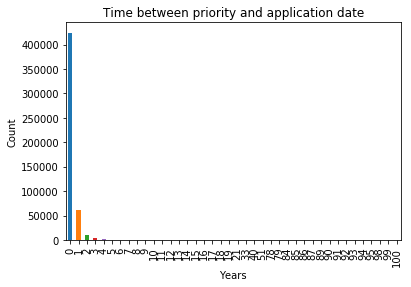

In [18]:
ax = (master.app_year-master.priority_date).value_counts().sort_index().plot(kind='bar', title='Time between priority and application date')
ax.set_ylabel('Count')
ax.set_xlabel('Years')

Text(0.5,1,'Time between priority and application date')

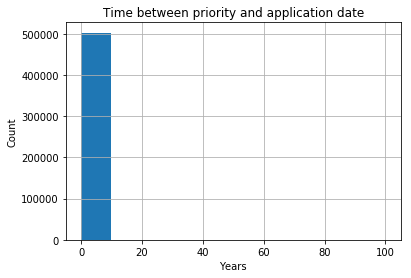

In [28]:
ax = (master.app_year-master.priority_date).hist(bins=10)
ax.set_ylabel('Count')
ax.set_xlabel('Years')
ax.set_title('Time between priority and application date')

Text(0.5,0,'Priority Year')

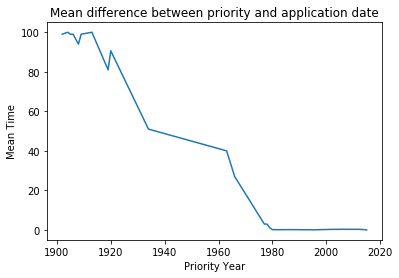

In [29]:
master['layover'] = master.app_year - master.priority_date
ax = master.groupby('priority_date')['layover'].mean().plot(title='Mean difference between priority and application date')
ax.set_ylabel('Mean Time')
ax.set_xlabel('Priority Year')

Same thing, but elimiate pre-1980

In [35]:
post_1980 = master.loc[master.priority_date >=1980]

(0, 1)

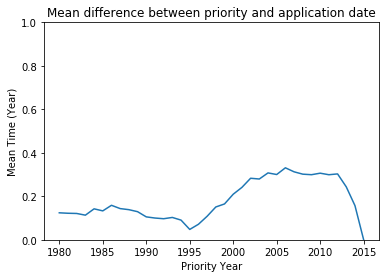

In [36]:
ax = post_1980.groupby('priority_date')['layover'].mean().plot(title='Mean difference between priority and application date')
ax.set_ylabel('Mean Time (Year)')
ax.set_xlabel('Priority Year')
ax.set_ylim([0,1])

Let's do this again, but separate by foreign and domestic

In [43]:
post_1980['foreign_priority'] = 0

/home/tiera/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
post_1980.loc[post_1980.patent_number.isin(foreign.patent_id)]

,patent_number,grant_year,app_year,num_inventors,us_inventor,cite_foreign_patent,is_missing,num_design_cited,num_utility_cited,non-pat_refs,num_figures,num_assignees,priority_date,missing_data,layover
163,D261317,1981,1980,3,0.0,1.0,1,3,1,1.0,5.0,1,1980,0,0
164,D261318,1981,1980,3,0.0,1.0,0,1,0,1.0,6.0,1,1980,0,0
165,D261319,1981,1980,3,0.0,0.0,1,3,1,1.0,5.0,1,1980,0,0
189,D261441,1981,1980,3,0.0,1.0,0,1,0,1.0,6.0,1,1980,0,0
259,D261929,1981,1980,1,0.0,0.0,1,2,1,3.0,5.0,1,1980,0,0
470,D262733,1982,1980,1,0.0,0.0,1,2,1,0.0,7.0,1,1980,0,0
516,D263003,1982,1980,1,0.0,1.0,1,1,2,1.0,5.0,3,1980,0,0
692,D263587,1982,1980,1,0.0,0.0,1,2,1,3.0,4.0,1,1980,0,0
776,D263833,1982,1980,1,0.0,0.0,1,2,1,1.0,7.0,1,1980,0,0
777,D263834,1982,1980,2,0.0,0.0,1,2,1,3.0,7.0,1,1980,0,0
